In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

In [19]:
#OLD DATA!!!!!!
# acceleration_g = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/Acceleration_with_g_dataframe.csv')
# acceleration_no_g = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/acceleration_witout_g.csv')
# chirp = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/Chirp.csv')
# collision = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/Collision_dataframe.csv')
# echo = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/Echo.csv')
# gps = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/GPS_dataframe.csv')
# gyroscope = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/gyroscope.csv')
# sound_speed = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/SpeedOfSound.csv')

In [20]:
#NEW DATA
df_train = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/bikingData/df_train.csv')

In [21]:
df_train.isna().sum()

Unnamed: 0                     0
X (m/s^2)                      9
Y (m/s^2)                      9
Z (m/s^2)                      9
X (m/s^2).1                   33
Y (m/s^2).1                   33
Z (m/s^2).1                   33
X (rad/s)                     29
Y (rad/s)                     29
Z (rad/s)                     29
Latitude (°)               48805
Longitude (°)              48805
Height (m)                 48805
Velocity (m/s)             48858
Direction (°)              48861
Horizontal Accuracy (m)    48805
Vertical Accuracy (°)      48805
Type                           0
dtype: int64

In [36]:
# Drop two specific columns (for example, 'Unnamed: 0' and 'Type')
df_train_cleaned = df_train.drop(columns=['Unnamed: 0', 'Type'])

In [49]:
df_train.head()

,Unnamed: 0,X (m/s^2),Y (m/s^2),Z (m/s^2),X (m/s^2).1,Y (m/s^2).1,Z (m/s^2).1,X (rad/s),Y (rad/s),Z (rad/s),Latitude (°),Longitude (°),Height (m),Velocity (m/s),Direction (°),Horizontal Accuracy (m),Vertical Accuracy (°),Type
0,0,-3.832630,5.947432,5.492678,-2.367685,-0.574165,-1.221704,-0.588211,-0.834931,-0.197171,52.339624,4.85999,4.100923,NaN,NaN,1414.0,72.527664,O
1,1,-3.881878,5.902975,6.959328,-2.334146,-0.536114,0.199649,-0.629901,-0.856221,-0.108904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O
2,2,-3.724854,5.900580,7.979457,-2.265538,-0.483268,0.877196,-0.659101,-0.768441,-0.028705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O
3,3,-3.463797,6.011499,8.480614,-1.788228,-0.238655,1.322269,-0.642982,-0.656313,-0.047527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O
4,4,-2.512974,6.253995,9.043294,-0.805407,-0.001805,1.817522,-0.580248,-0.562676,-0.174181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O


In [37]:
df_stats= df_train_cleaned.describe()

In [38]:

from tabulate import tabulate


# Convert the DataFrame to a nicely formatted table
table = tabulate(df_stats, headers='keys', tablefmt='html')

# Save the table as an HTML file
with open('statistics_table.html', 'w') as f:
    f.write(table)

# Save the table as a LaTeX file
table_latex = tabulate(df_stats, headers='keys', tablefmt='latex')
with open('statistics_table.tex', 'w') as f:
    f.write(table_latex)

In [ ]:
# Drop columns with all missing values
df_train_cleaned = df_train.dropna(how='all', axis=1)

# Drop two specific columns (for example, 'Unnamed: 0' and 'Type')
df_train_cleaned = df_train_cleaned.drop(columns=['Unnamed: 0', 'Type'])

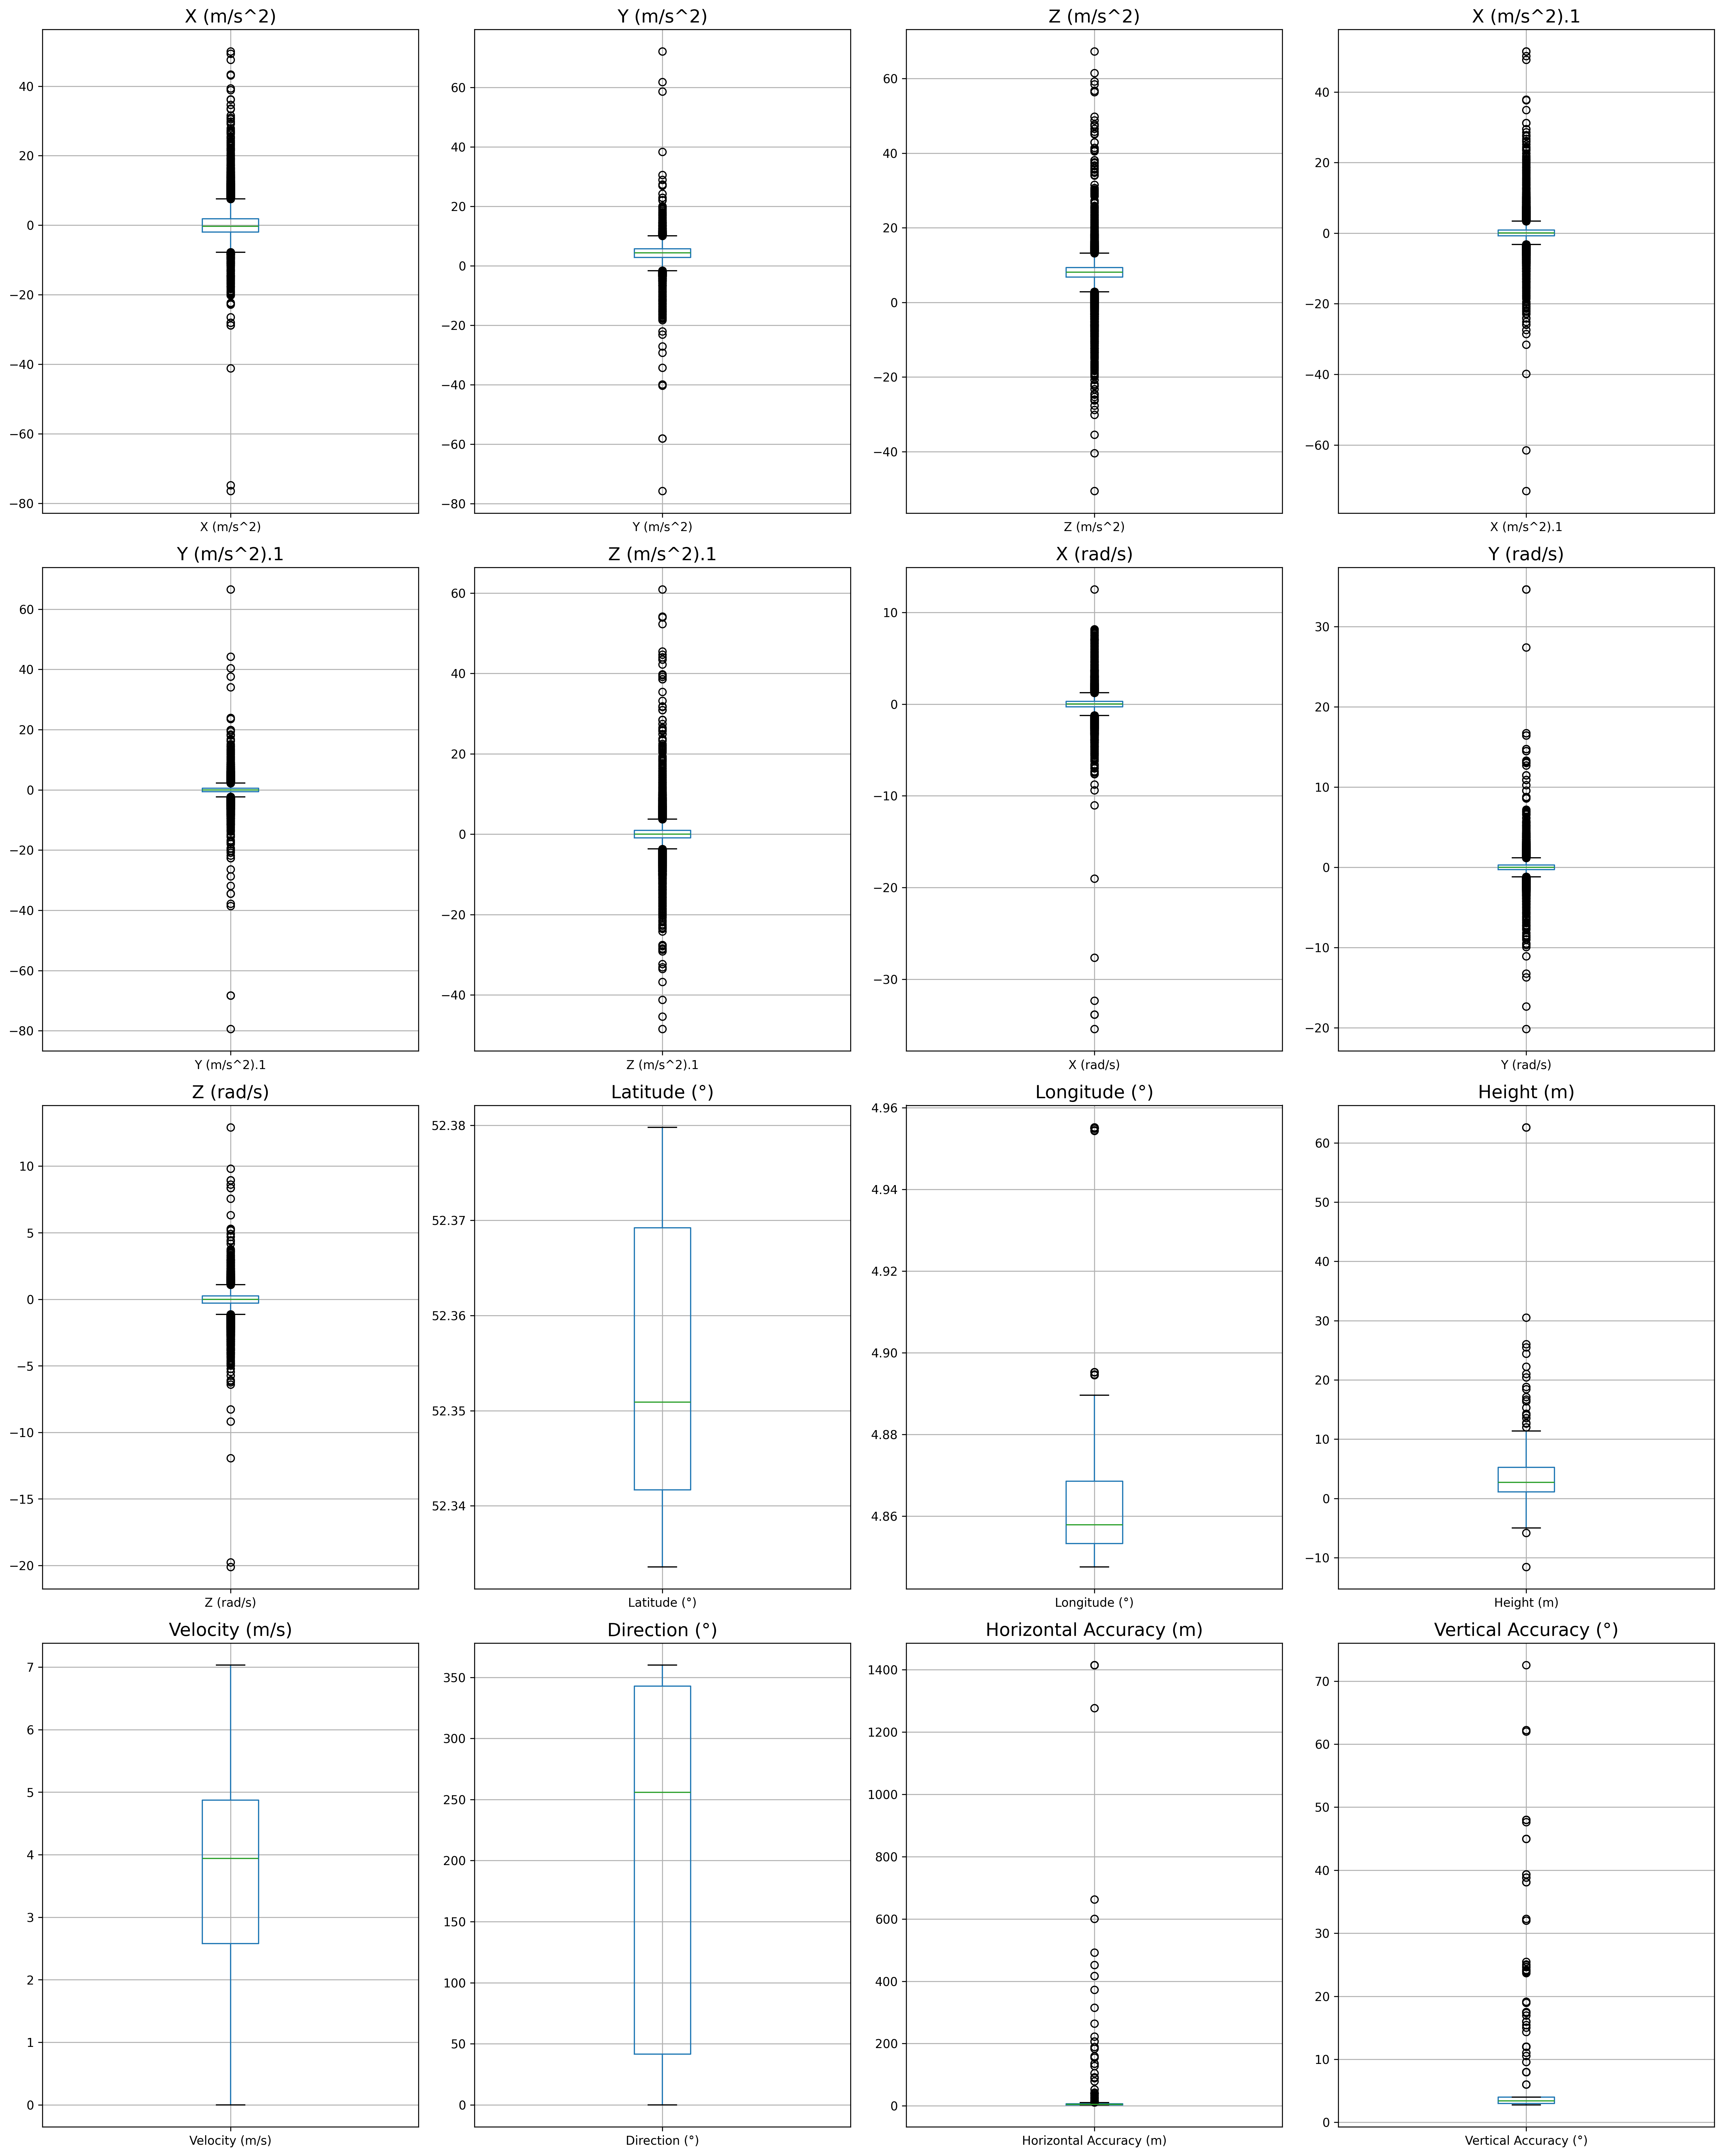

In [26]:
# Create individual box plots for each variable
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 25), dpi=300)
axes = axes.flatten()

for i, col in enumerate(df_train_cleaned.columns):
    if i < len(axes):
        df_train_cleaned.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col, size=15)

plt.tight_layout()
output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/boxplot_df_train.png'  
plt.savefig(output_path)
plt.show()

In [40]:
# Drop columns with all missing values
df_train_cleaned = df_train.dropna(how='all', axis=1)

# Drop the 'Unnamed: 0' column but keep the 'Type' column for plotting
df_train_cleaned = df_train_cleaned.drop(columns=['Unnamed: 0'])

/var/folders/y2/4b7d_vjj5d70m77w1bxwqw640000gn/T/ipykernel_23937/1562250595.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y=col, data=df_train_cleaned, ax=axes[i], palette=palette)
/var/folders/y2/4b7d_vjj5d70m77w1bxwqw640000gn/T/ipykernel_23937/1562250595.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y=col, data=df_train_cleaned, ax=axes[i], palette=palette)
/var/folders/y2/4b7d_vjj5d70m77w1bxwqw640000gn/T/ipykernel_23937/1562250595.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y=col, data=

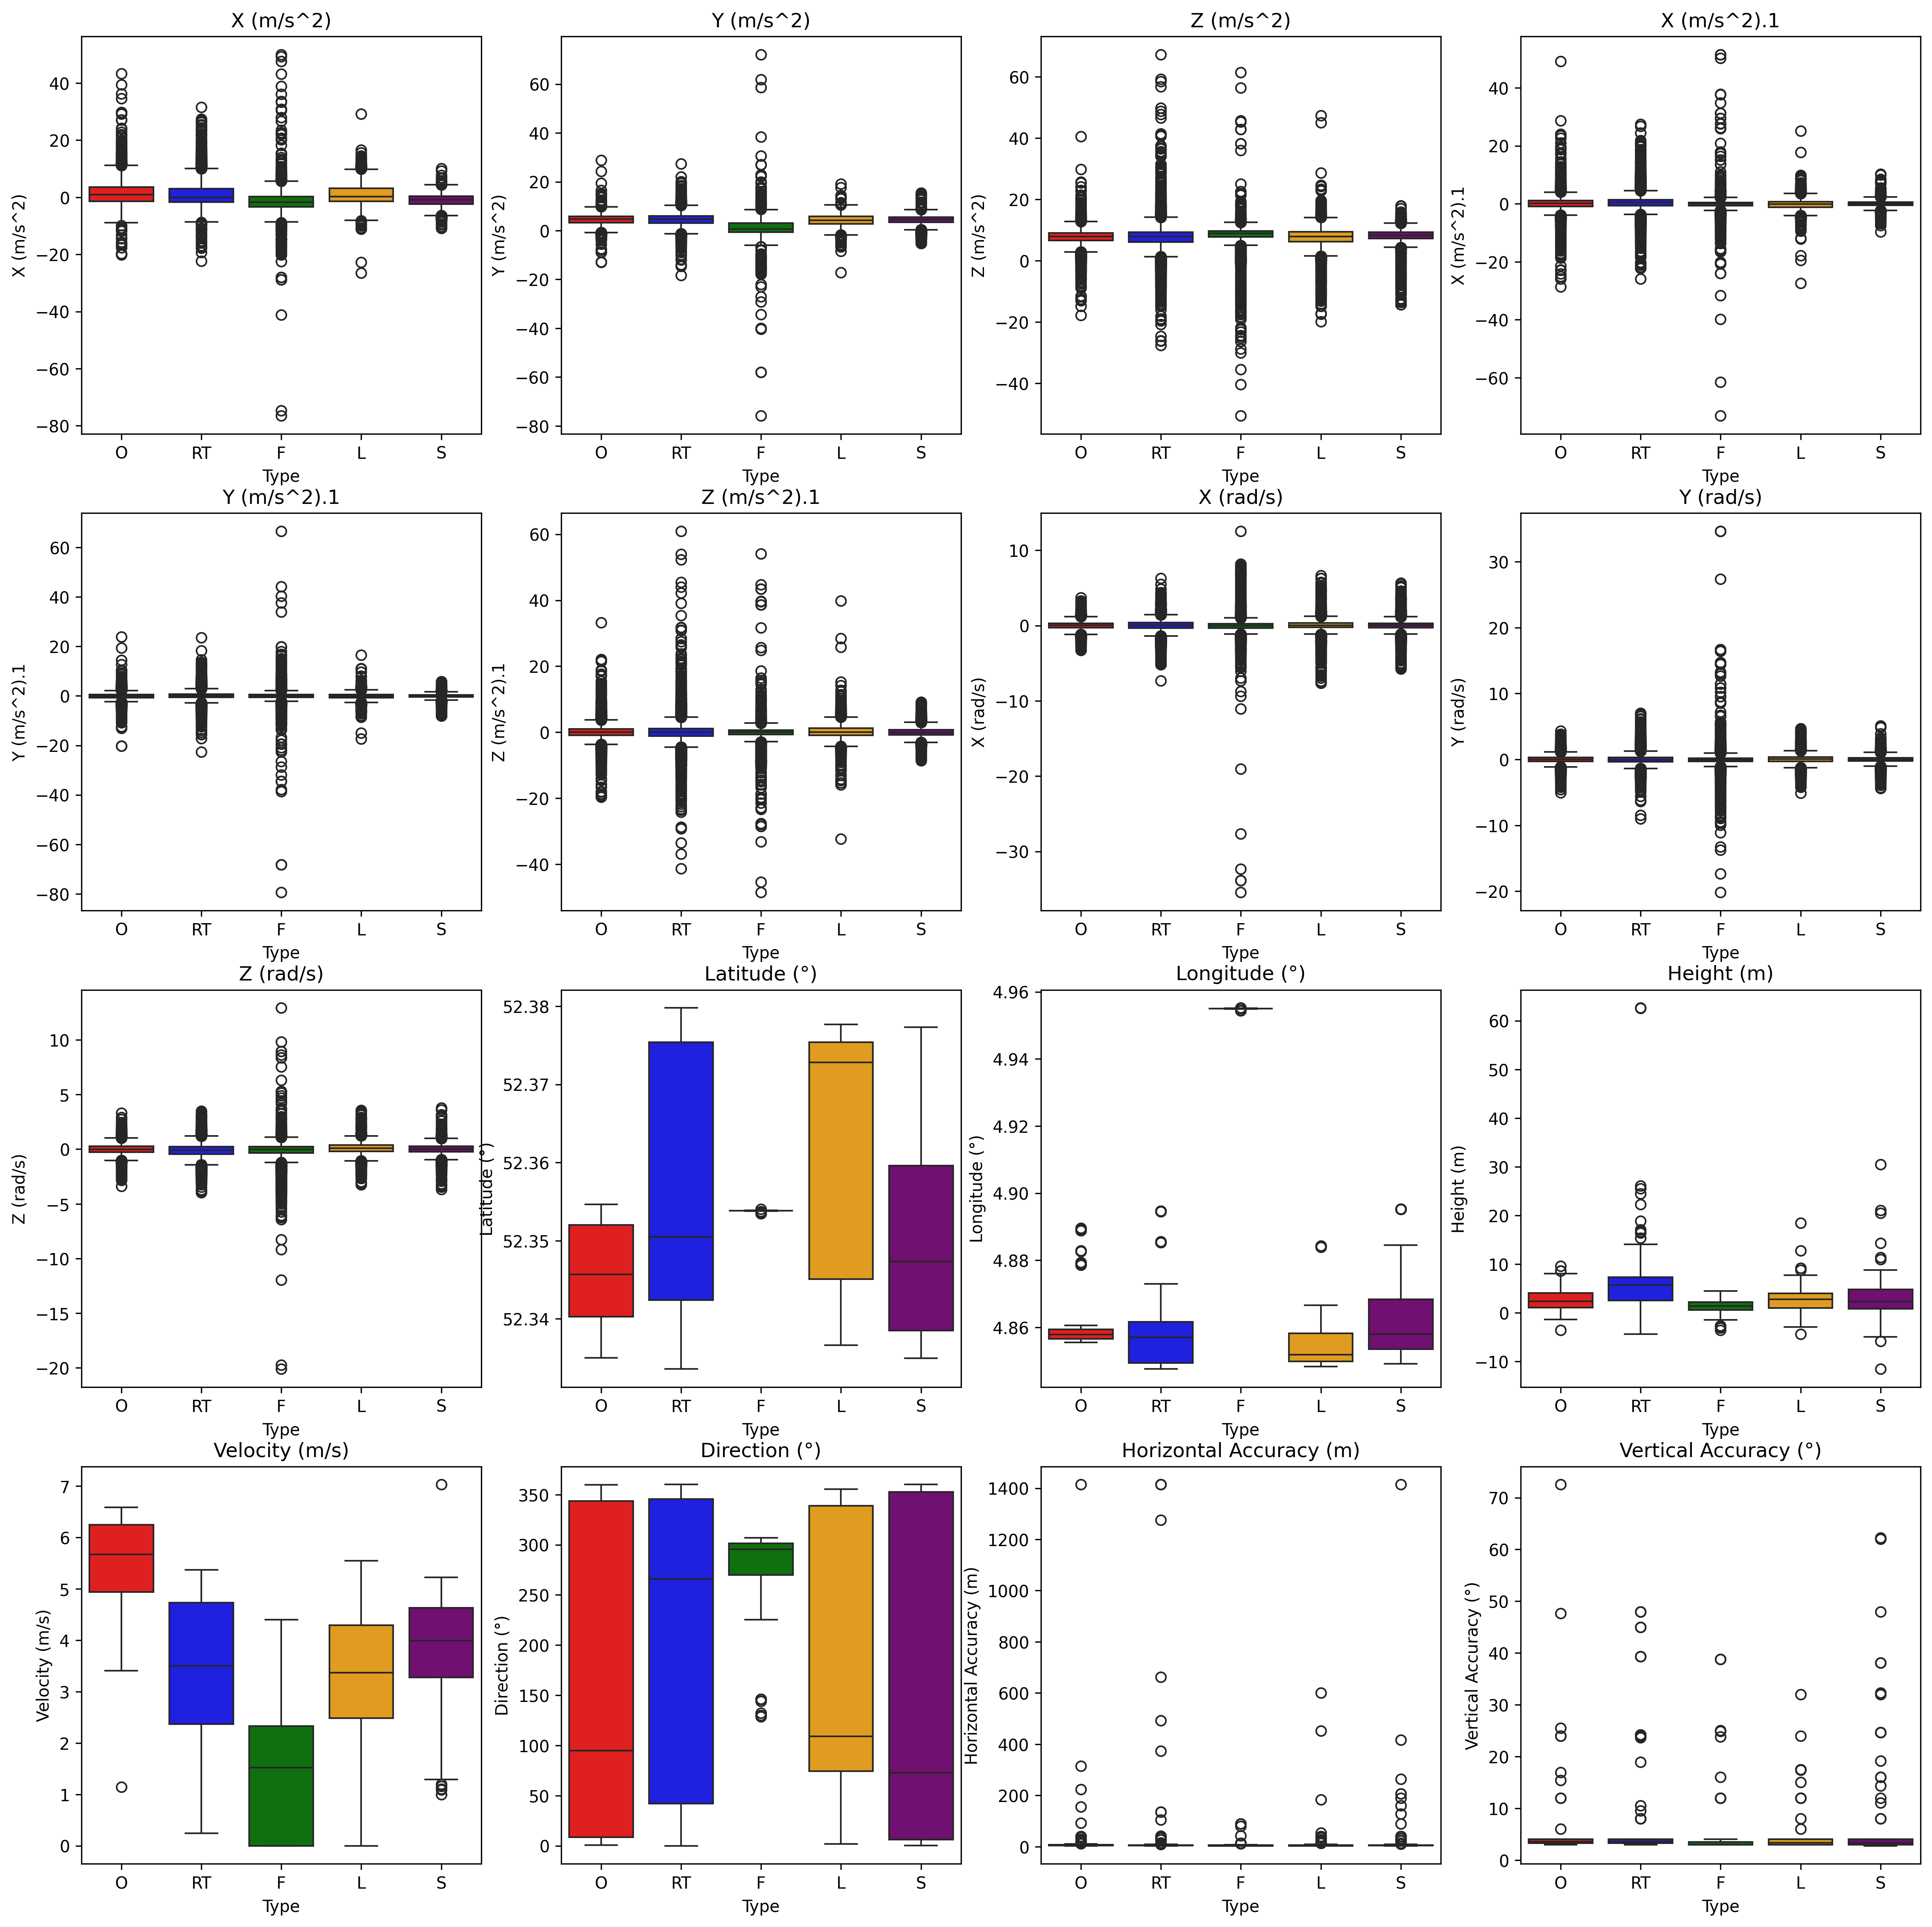

In [46]:


# Create individual box plots for each variable
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), dpi=300)
axes = axes.flatten()
# Define a custom palette
unique_types = df_train_cleaned['Type'].unique()
# Define a custom palette based on unique types
palette = {typ: col for typ, col in zip(unique_types, ['red', 'blue', 'green', 'orange', 'purple'])}

for i, col in enumerate(df_train_cleaned.columns):
    if col != 'Type':  # Skip the 'Type' column for individual plots
        sns.boxplot(x='Type', y=col, data=df_train_cleaned, ax=axes[i], palette=palette)
        axes[i].set_title(col, size=12)
        axes[i].set_xlabel('Type')
        axes[i].set_ylabel(col)

output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/boxplot_df_train_by_type_colored.png'
plt.savefig(output_path)
plt.show()

In [ ]:
#WE DO NOT INCLUDE THIS MEASUREMENT ANYMORE
# # Load the data
# file_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/Echo.csv'  # Update with your file path
# data = pd.read_csv(file_path)

# normalized_cc = data['Normalized CC (a.u.)'].values  # Replace with actual column name

# # Generate the lag array
# lags = np.arange(-len(normalized_cc) // 2, len(normalized_cc) // 2 + 1)

# # Plot the normalized cross-correlation
# plt.figure(figsize=(10, 6), dpi=300)
# plt.plot(lags[1:], normalized_cc, color='blue')
# plt.title('Normalized Cross-Correlation between echo signals', size=20)
# plt.xlabel('Lag', size=14)
# plt.ylabel('Normalized Cross-Correlation', size=14)
# plt.grid(True)
# # Save the figure in a specific location
# output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/normalized_cross_correlation_echo.png'  
# plt.savefig(output_path)
# plt.show()

In [ ]:
# Define types and counts
types = ['RT', 'S', 'LT', 'F', 'O']
counts = [1, 2, 3, 4]

# Plot the data
plt.figure(figsize=(14, 8), dpi=300)

# Generate unique colors for each type and count combination
colors = plt.cm.jet(np.linspace(0, 1, len(types) * len(counts)))

for idx, t in enumerate(types):
    for c in counts:
        subset = gyroscope[(gyroscope['Type'] == t) & (gyroscope['Count'] == c)]
        color_idx = idx * len(counts) + (c - 1)  # Ensure unique color for each combination
        plt.plot(subset['Time (s)'], subset['Absolute (rad/s)'], label=f'{t} {c}', color=colors[color_idx])

plt.title('Absolute Angular Velocity over Time')
plt.xlabel('Time (s)')
plt.ylabel('Absolute Angular Velocity (rad/s)')
plt.legend(fontsize=14)
plt.grid(True)
# Save the figure in a specific location
output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/abs_angular_veloc.png'  
plt.savefig(output_path)
plt.show()

In [48]:
# Define colors for each type
colors = {
    'RT': 'blue',
    'S': 'green',
    'LT': 'red',
    'F': 'purple',
    'O': 'orange'
}

# Define line styles for each count
line_styles = {
    1: '-',
    2: '--',
    3: '-.',
    4: ':'
}

# Plot the data
plt.figure(figsize=(14, 8), dpi=300)
legend_added = set()
for t in types:
    subset = df_train['Velocity (m/s)'][(df_train['Type'] == t)]
    label = t if t not in legend_added else None
    plt.plot(subset['Time (s)'], subset['Absolute (rad/s)'], label=label, color=colors[t])
    legend_added.add(t)

plt.title('Absolute Angular Velocity over Time', size=20)
plt.xlabel('Time (s)', size=14)
plt.ylabel('Absolute Angular Velocity (rad/s)', size=14)
plt.grid(True)
plt.legend(fontsize=14)
# Save the figure in a specific location
output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/abs_angular_veloc.png'  
plt.savefig(output_path)
plt.show()

KeyError: 'Time (s)'

<Figure size 4200x2400 with 0 Axes>

In [3]:
data = pd.read_csv('datasets/bikingData/all_features_df_train.csv')

In [ ]:
data['Absolute Radius_rolling_mean']

In [10]:
data_rad = data.dropna(subset=['Absolute Radius','Type'])

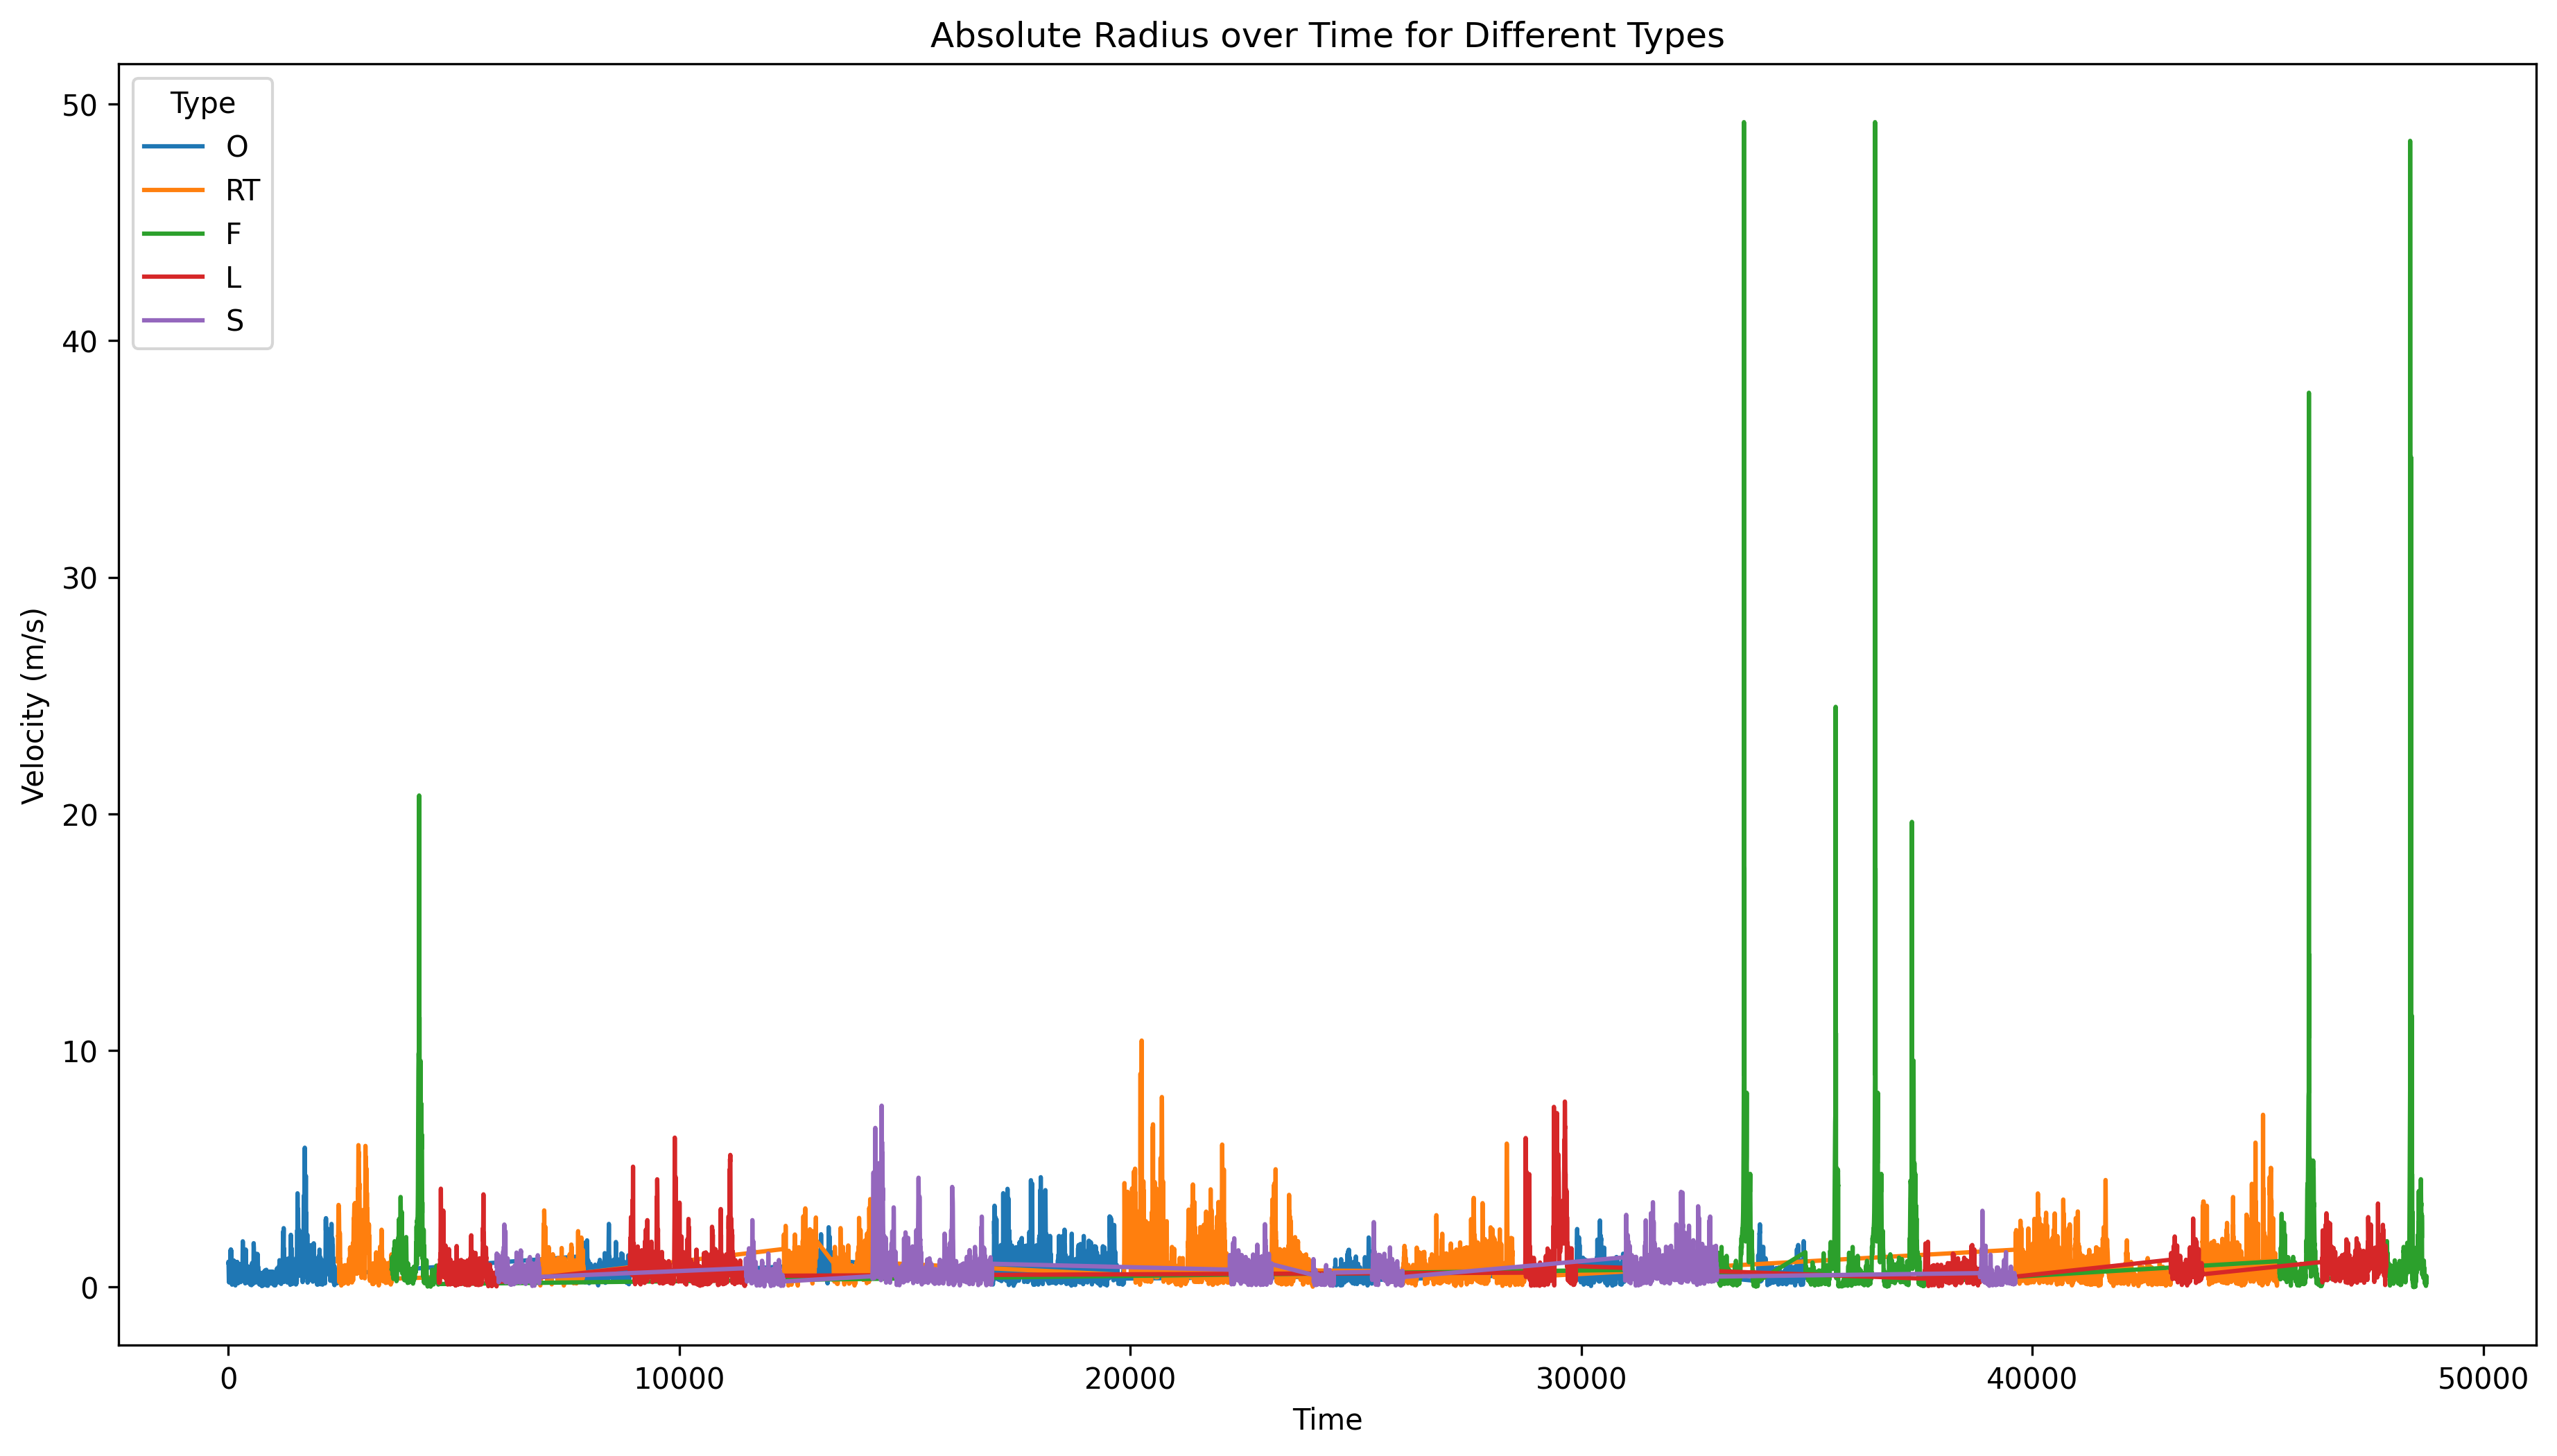

In [12]:
# Ensure the 'Type' column is present and velocity data is not missing
#df_train_cleaned = df_train.dropna(subset=['X (rad/s)', 'Type'])

# Plotting the velocity over time for different types
plt.figure(figsize=(15, 8), dpi=300)
sns.lineplot(data=data_rad, x='Unnamed: 0', y='Absolute Radius', hue='Type', palette='tab10')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Absolute Radius over Time for Different Types')
plt.legend(title='Type')
plt.show()

In [19]:
data_rad['time_min'] = (data_rad['Unnamed: 0']/10)/60

/var/folders/y2/4b7d_vjj5d70m77w1bxwqw640000gn/T/ipykernel_31564/3974043883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rad['time_min'] = (data_rad['Unnamed: 0']/10)/60


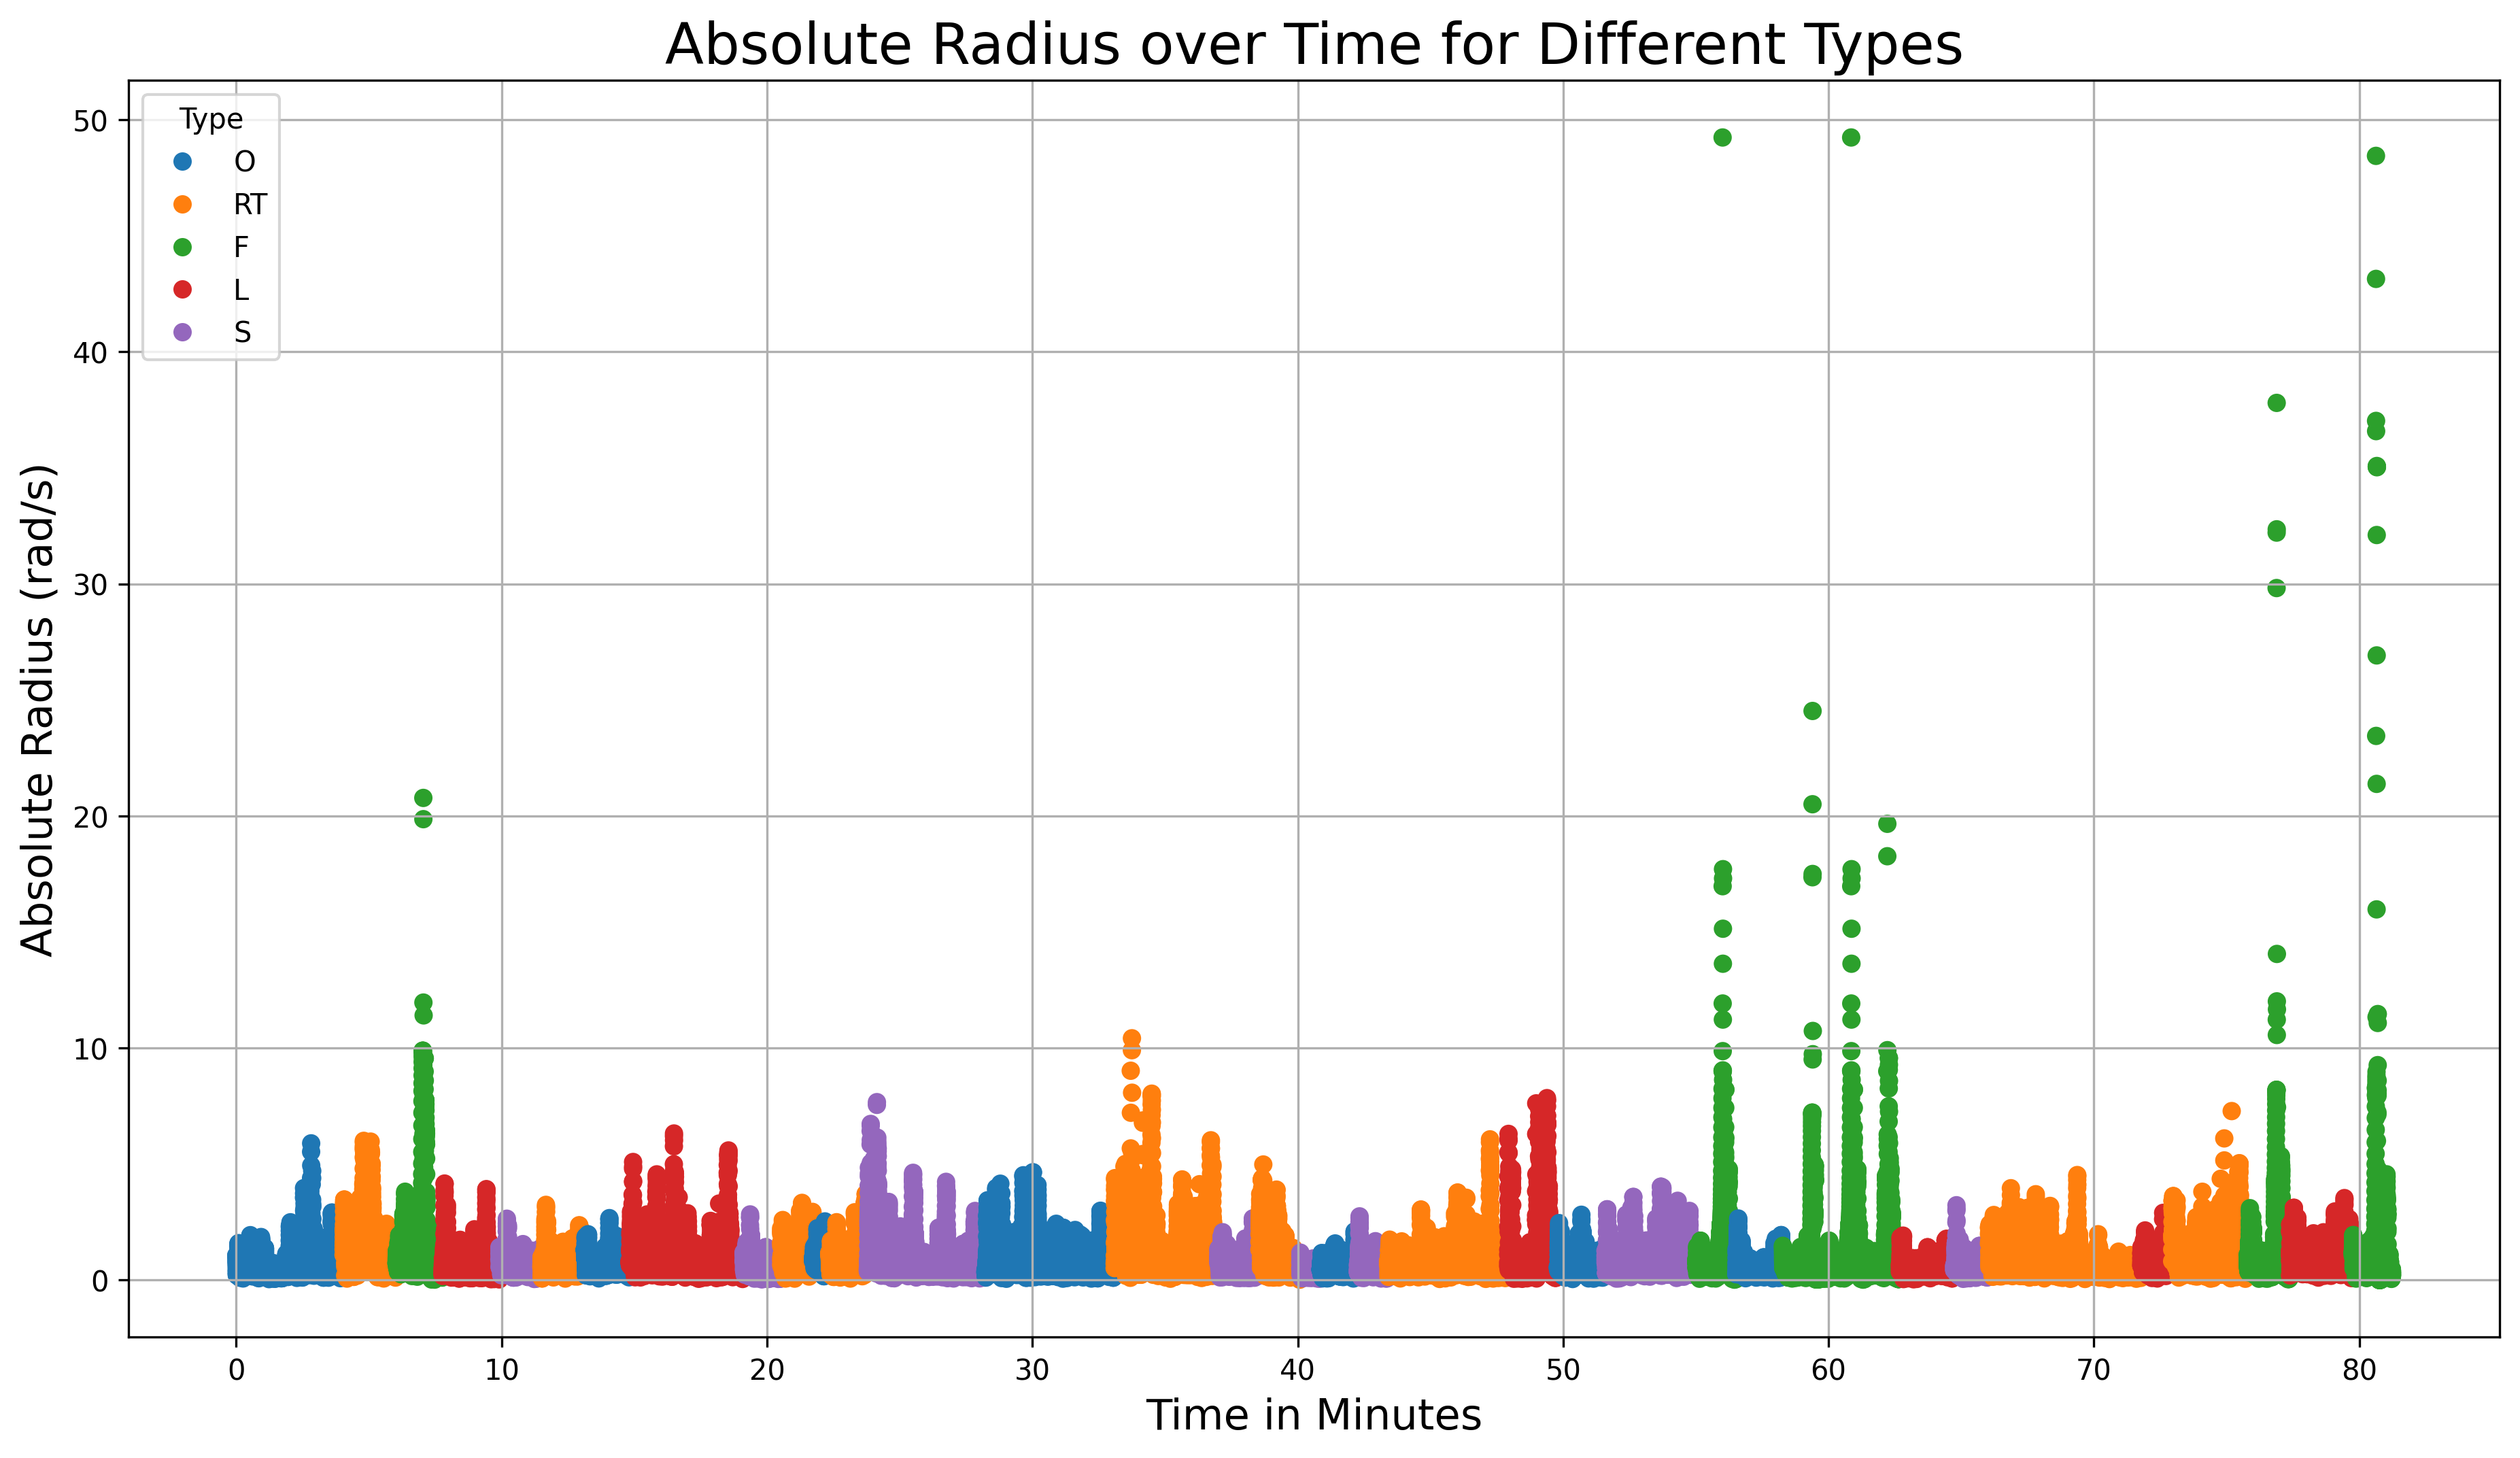

In [21]:
plt.figure(figsize=(15, 8), dpi=300)
sns.scatterplot(data=data_rad, x='time_min', y='Absolute Radius', hue='Type', palette='tab10', edgecolor=None)
plt.xlabel('Time in Minutes', size=15)
plt.ylabel('Absolute Radius (rad/s)', size=15)
plt.title('Absolute Radius over Time for Different Types', size=20)
plt.legend(title='Type')

plt.grid(True)
output_path ='/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/abs_veloc_scatter.png'
plt.savefig(output_path)
plt.show()